Simple analysis about the spread of AH1N1 virus (2009-2010).

Information data from https://www.cdc.gov/flu/pandemic-resources/2009-h1n1-pandemic.html

In [201]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

**SIR**

In [202]:
def fun(y, t, eta, mu):
    s, i, r = y
    dsdt = -eta * s * i
    didt = eta * s * i  - mu * i
    drdt = mu * i
    return dsdt, didt, drdt

In [203]:
"""
N = 2,964200 as the total population since, as 622,482 was the 21% of cases confirmed, the total sample (suspected individuals) were this amount.

I = 25 as the initial infected people. Since the data provided is given by weeks, WHO shows that the first week there were 25 positive infected cases.

S = N − I = 2,964,175 as the susceptible population.

R = 0 since at the begining there was not any recovered people.

µ = 0.2 as the recovery rate from the disease. It was got as the result of 1/5 where 5 is the average number of days that
the disease last.

β = 0.6 taking 3 as number of people an infectious person typically infect in a susceptible population, beta is calculated 
as 3(µ) 
"""

# N: Total population  
N = 2964200

# I0: Number of infected individuals at t = 0.
I0 = 25
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 2964175
s0 = S0 / N

# R0: Number of recovered individuals at t = 0.
R0 = 0
r0 = R0 / N

# Transmission Rate and Recovery Rate
eta = 0.6
mu = 0.2

# Time points
t = np.linspace(0, 67, 3890513)

In [204]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t
y0 = s0, i0, r0
ret = odeint(fun, y0, t, args=(eta, mu))
s, i, r = ret.T


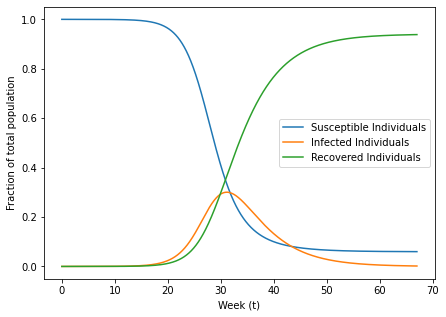

In [205]:
# Plot Result
fig = plt.figure(figsize=(7,5))
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.plot(t, r, label = "Recovered Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('Week (t)')
plt.show()

In [206]:
from scipy.optimize import curve_fit

In [207]:
idata = [25,367,2500,7520,11168,15510,21940,29669,44287,59814,89921,112212,134503,148442,162380,182166,209438,231822,254206,277607,296471,318925,343298,378223,399232,414945,
441661,482300,503536,525060,622482]
idata = np.array(idata)
tdata = np.linspace(1,31, 31)

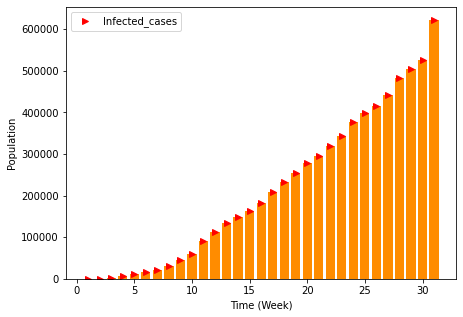

In [208]:
# Data Visualization
fig = plt.figure(figsize=(7,5))
plt.plot(tdata, idata, '.', label = "Infected_cases",color ='red',marker='>')
t1 =[]
for i in range(1,32):
    t1.append(i)
#fig = plt.figure(figsize=(7,5))
plt.bar(t1,idata,color='darkorange')
plt.legend()
plt.ylabel('Population')
plt.xlabel('Time (Week)')
plt.show()

In [209]:
# Variable Initialization

# N: Total population.
N = 2964200
fdata = idata / N

# I0: Number of infected individuals at t = 0.
I0 = 25
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 2964175
s0 = S0 / N

# R0: Number of recovered individuals at t = 0.
R0 = 0
r0 = R0 / N

y0 = s0, i0, r0

In [210]:
def fit_odeint(t, eta, mu):
    return odeint(fun, y0, t, args=(eta, mu))[:,1]

In [211]:
fit_odeint(tdata, eta, mu)

array([8.43397881e-06, 1.25824751e-05, 1.87992372e-05, 2.80490806e-05,
       4.18564170e-05, 6.24614484e-05, 9.31870662e-05, 1.39027895e-04,
       2.07399229e-04, 3.09363149e-04, 4.61361355e-04, 6.87926680e-04,
       1.02550319e-03, 1.52813985e-03, 2.27587330e-03, 3.38668630e-03,
       5.03347030e-03, 7.46739468e-03, 1.10484540e-02, 1.62822665e-02,
       2.38570999e-02, 3.46648931e-02, 4.97719770e-02, 7.02820896e-02,
       9.70219951e-02, 1.30021875e-01, 1.67911490e-01, 2.07584331e-01,
       2.44573230e-01, 2.74241236e-01, 2.93237856e-01])

In [212]:
popt, pcov = curve_fit(fit_odeint, tdata, fdata)
eta, mu = popt
print("Eta: ", round(eta,4))
print("Mu: ", round(mu, 4))

Eta:  0.8199
Mu:  0.3705


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


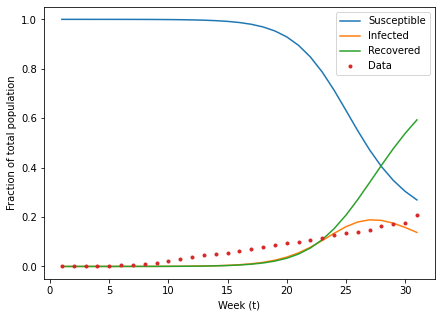

In [213]:
ret = odeint(fun, y0, tdata, args=(eta, mu))
s, i, r = ret.T

# Plot Result
fig = plt.figure(figsize=(7,5))
plt.plot(tdata, s, label = "Susceptible")
plt.plot(tdata, i, label = "Infected")
plt.plot(tdata, r, label = "Recovered")
plt.plot(tdata, fdata, '.', label = "Data")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('Week (t)')
plt.show()

In [214]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 2964200
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 25, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.8199,0.3705
# A grid of time points (in days)
t = np.linspace(0, 67, 3890488)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


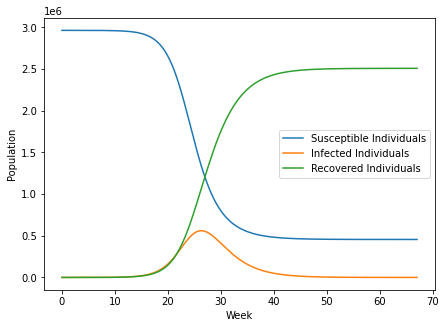

In [215]:
# Plot Result
fig = plt.figure(figsize=(7,5))
plt.plot(t, S, label = "Susceptible Individuals")
plt.plot(t, I, label = "Infected Individuals")
plt.plot(t, R, label = "Recovered Individuals")
plt.legend()
plt.ylabel('Population')
plt.xlabel('Week')
plt.show()

**SI**

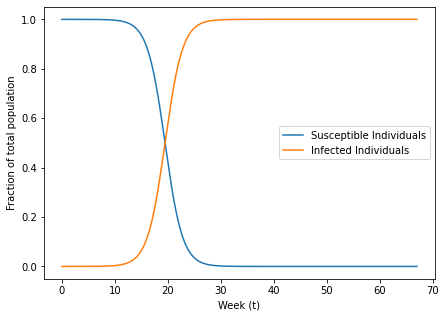

In [216]:
def funSI(y, t, eta):
    s, i = y
    dsdt = -eta * s * i
    didt = eta * s * i 
    return dsdt, didt
# N: Total population.
N = 2964200

# I0: Number of infected individuals at t = 0.
I0 = 25
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 2964175
s0 = S0 / N

# Transmission Rate and Recovery Rate
eta = 0.6

y0 = s0, i0

# Time points
t = np.linspace(0, 67,2964200)

# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
ret = odeint(funSI, y0, t,args=(eta,))

s, i = ret.T

# Plot Result
fig = plt.figure(figsize=(7,5))
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('Week (t)')
plt.show()

**SIS**

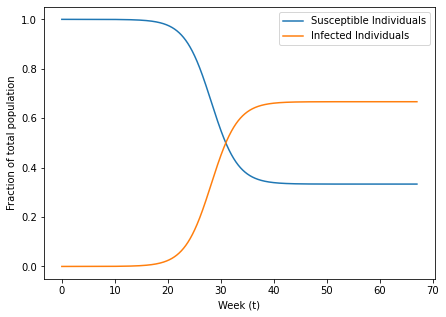

In [217]:
def funSIS(y, t, eta,mu):
    s, i = y
    dsdt = -eta * s * i + (mu*i)
    didt = eta * s * i - (mu*i)
    return dsdt, didt

# N: Total population.
N = 2964200

# I0: Number of infected individuals at t = 0.
I0 = 25
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 2964175
s0 = S0 / N

# Transmission Rate and Recovery Rate
eta = 0.6
mu = 0.2

y0 = s0, i0

# Time points
t = np.linspace(0, 67, 2964200)

ret = odeint(funSIS, y0, t,args=(eta,mu))

s, i = ret.T

# Plot Result
fig = plt.figure(figsize=(7,5))
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('Week (t)')
plt.show()

**Network**

In [218]:
import networkx as nx
import random

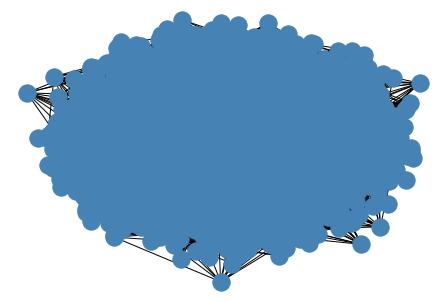

In [219]:
G = nx.erdos_renyi_graph(2964, 0.01, directed = False)
pos = nx.random_layout(G)
nx.draw(G,node_color='steelblue')

In [220]:
nodes_sample = sorted(random.sample(list(G.nodes()),1))
nodes_sample

[2011]

In [221]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'Susceptible'
    for i in nodes_sample:
        state[i] = 'Infected'
    return state

In [223]:
nx.set_node_attributes(G, initial_state(G), 'state')

{171: 'Recovered',
 567: 'Recovered',
 745: 'Recovered',
 808: 'Recovered',
 1299: 'Recovered',
 2026: 'Recovered',
 2060: 'Recovered',
 2282: 'Recovered',
 2766: 'Recovered',
 2770: 'Recovered'}

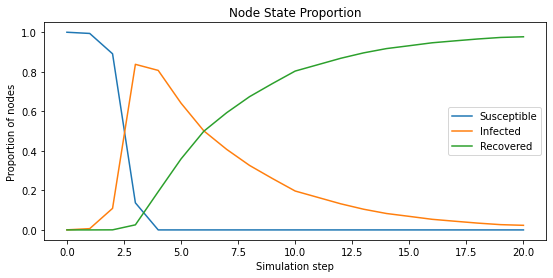

In [224]:
def state_transition(G, current_state):
    MU = 0.2  #Recovered probability
    BETA = 0.6  #Infection probability
    s = 0
    In = [1]
    Sus = [2963]
    Rec = [0]
    step = [s]
    c_in = 1
    c_sus = 2963
    c_rec = 0
    while (s <= 19):
        next_state = {}
        for node in G.nodes:
            if current_state[node] == 'Infected':
                if random.random() < MU:
                    next_state[node] = 'Recovered'
                    c_rec += 1
                    c_in -= 1
            elif current_state[node] == 'Susceptible':
                for neighbor in G.neighbors(node):
                    if current_state[neighbor] == 'Infected':
                        if random.random() < BETA:
                            next_state[node] = 'Infected'
                            c_in += 1
                            c_sus -= 1
                            break
                    else: continue
            else: continue

        In.append(c_in)
        Sus.append(c_sus)
        Rec.append(c_rec)
        s += 1
        step.append(s)
        current_state.update(next_state)
        nx.set_node_attributes(G, current_state, 'state')



    fig,ax = plt.subplots(figsize=(9,4))
    plt.plot(np.array(step),np.array(Sus)*0.000337381,label='Susceptible')
    plt.plot(np.array(step),np.array(In)*0.000337381,label='Infected')
    plt.plot(np.array(step),np.array(Rec)*0.000337381,label='Recovered')
    plt.title('Node State Proportion')
    plt.xlabel('Simulation step')
    plt.ylabel('Proportion of nodes')
    plt.legend()

    return next_state

test_state = nx.get_node_attributes(G, 'state')
state_transition(G, test_state)

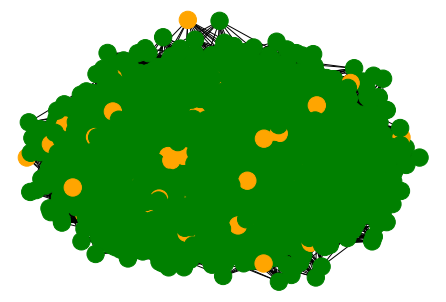

In [225]:
random_node_colors = ['steelblue' if node[1] == 'Susceptible'  else 'green' if node[1]== 'Recovered' else 'orange' for node in G.nodes(data = 'state')]
nx.draw(G, node_color=random_node_colors)#, with_labels=True)